**What are questions that you need the data to Answer🤔? **

- Does age has impact on survived or not?
- Does gender has impact on survived or not?
- Does Pclass has impact on survived or not?
- Does SibSp has impact on survived or not?
- Does Parch has impact on survived or not?
- Does cabin has impact on survived or not?
- Does ticket has impact on survived or not?
- Does embarked has impact on survived or not?

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# list the features we have

- sibsp : Number of Siblings/Spouses Aboard
- parch : Number of Parents/Children Aboard

***1. Categorical features***
   * name
   * sex   
   * ticket
   * cabin
   * embarked
   
***2. Numerical features***
   * PassengerId
   * Survived
   * Pclass
   * Age
   * SibSp
   * Parch
   * Fare
  

# Data Preperation

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df['Age'].mean()

29.69911764705882

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [11]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

In [12]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mode()[0])

In [13]:
df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df.shape

(891, 11)

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


# Feature Extraction

In [17]:
df['Age_cat'] = pd.cut(df['Age'], bins = [0, 12, 18,40,65,100], labels = ['Children', 'Teens', 'Adults', 'Mid Adults','Elderly'])
test_df['Age_cat'] = pd.cut(test_df['Age'], bins = [0, 12, 18,40,65,100], labels = ['Children', 'Teens', 'Adults', 'Mid Adults','Elderly'])

In [18]:
df['Fare_cat'] = pd.cut(df['Fare'], bins = [float('-inf'), 7.91, 14.454,31,99,250,float('inf')], labels = [0, 1, 2, 3,4,5])
test_df['Fare_cat'] = pd.cut(test_df['Fare'], bins = [float('-inf'), 7.91, 14.454,31,99,250,float('inf')], labels = [0, 1, 2, 3,4,5])

In [19]:
df.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_cat,Fare_cat
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,S,Adults,1
883,884,0,2,"Banfield, Mr. Frederick James",male,28.000000,0,0,C.A./SOTON 34068,10.5000,S,Adults,1
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,29.699118,0,0,330909,7.6292,Q,Adults,0
753,754,0,3,"Jonkoff, Mr. Lalio",male,23.000000,0,0,349204,7.8958,S,Adults,0
734,735,0,2,"Troupiansky, Mr. Moses Aaron",male,23.000000,0,0,233639,13.0000,S,Adults,1
783,784,0,3,"Johnston, Mr. Andrew G",male,29.699118,1,2,W./C. 6607,23.4500,S,Adults,2
59,60,0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,CA 2144,46.9000,S,Children,3
55,56,1,1,"Woolner, Mr. Hugh",male,29.699118,0,0,19947,35.5000,S,Adults,3
540,541,1,1,"Crosby, Miss. Harriet R",female,36.000000,0,2,WE/P 5735,71.0000,S,Adults,3
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.000000,0,0,19972,0.0000,S,Adults,0


# Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt

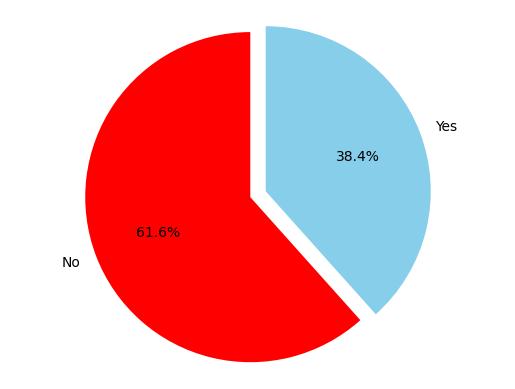

In [21]:
Survived_counts = df['Survived'].value_counts()

plt.pie(Survived_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=['red', 'skyblue'], explode = (0.1, 0))


plt.axis('equal')  
plt.show()

<Axes: xlabel='Age_cat', ylabel='Survived'>

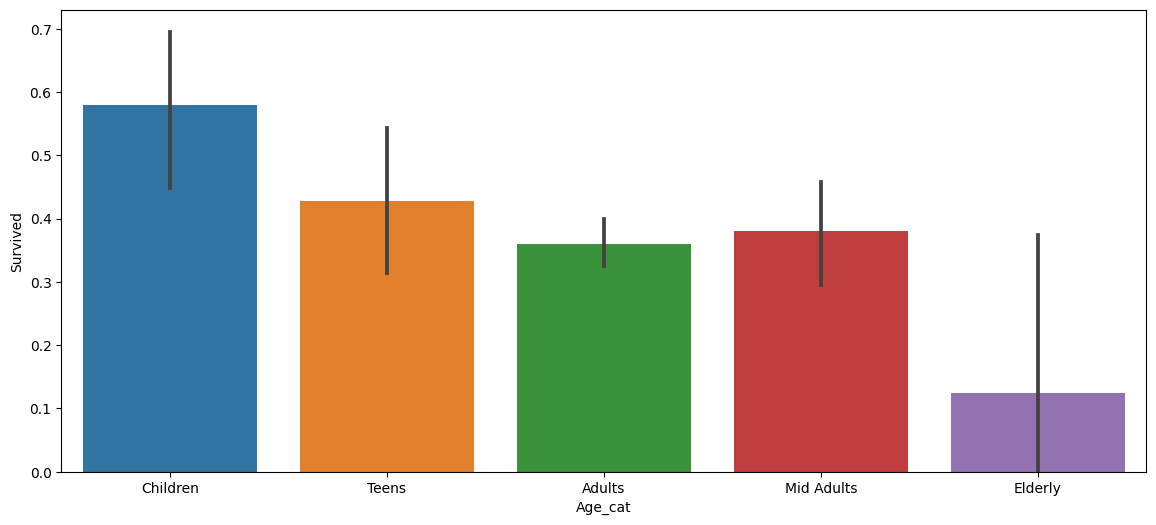

In [22]:
import seaborn as sns
plt.figure(figsize=(14,6))
sns.barplot(x=df['Age_cat'],y=df['Survived'])

<Axes: xlabel='Sex', ylabel='Survived'>

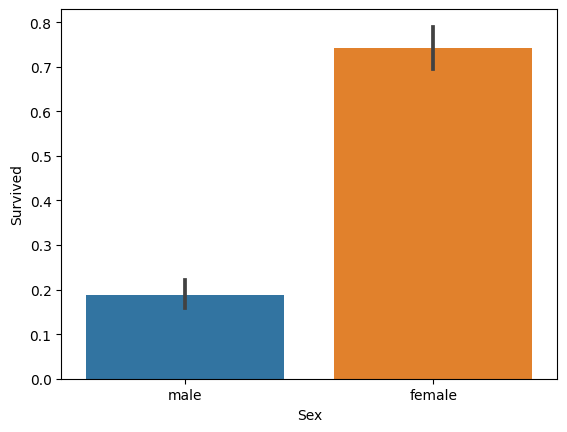

In [23]:
sns.barplot(x=df['Sex'],y=df['Survived'])

<Axes: xlabel='Pclass', ylabel='Survived'>

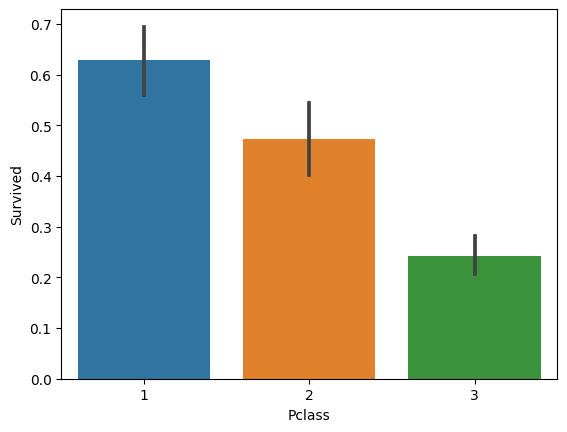

In [24]:
sns.barplot(x=df['Pclass'],y=df['Survived'])

<Axes: xlabel='SibSp', ylabel='Survived'>

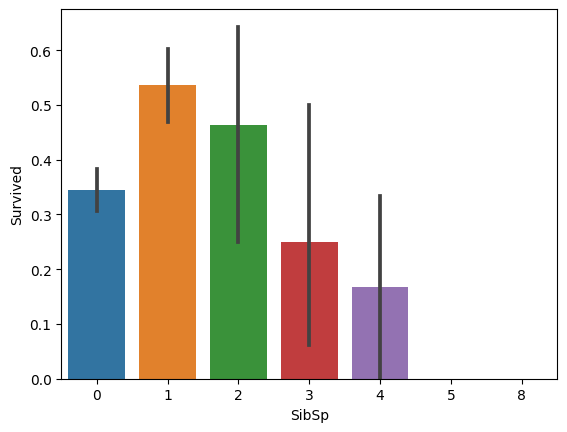

In [25]:
sns.barplot(x=df['SibSp'],y=df['Survived'])

<Axes: xlabel='Fare_cat', ylabel='Survived'>

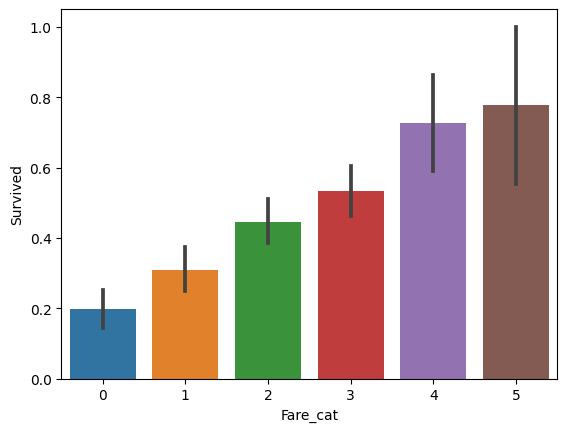

In [26]:
sns.barplot(x=df['Fare_cat'],y=df['Survived'])

<Axes: xlabel='Parch', ylabel='Survived'>

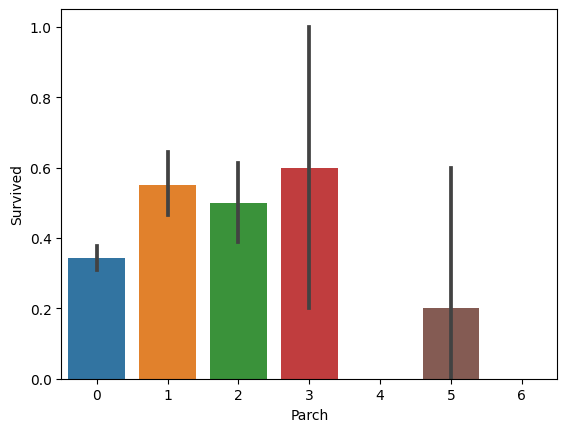

In [27]:
sns.barplot(x=df['Parch'],y=df['Survived'])

<Axes: xlabel='Embarked', ylabel='Survived'>

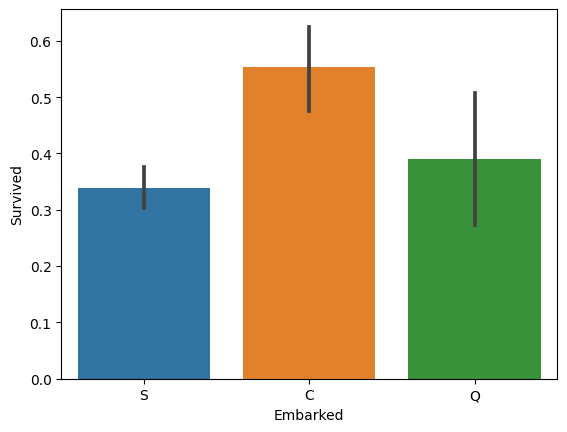

In [28]:
sns.barplot(x=df['Embarked'],y=df['Survived'])

<Axes: xlabel='Name', ylabel='Survived'>

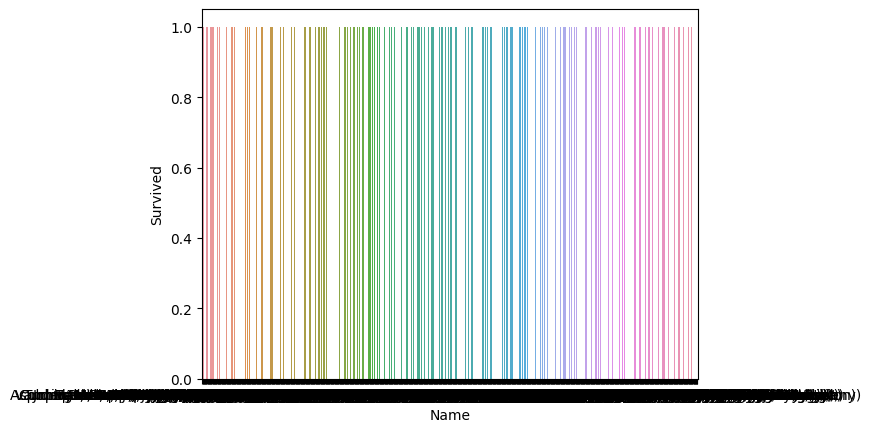

In [29]:
sns.barplot(x=df['Name'],y=df['Survived'])

# Encoding

In [30]:
df.select_dtypes(include=['O', 'category'])

,Name,Sex,Ticket,Embarked,Age_cat,Fare_cat
0,"Braund, Mr. Owen Harris",male,A/5 21171,S,Adults,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,Adults,3
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,Adults,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,Adults,3
4,"Allen, Mr. William Henry",male,373450,S,Adults,1
...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S,Adults,1
887,"Graham, Miss. Margaret Edith",female,112053,S,Adults,2
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S,Adults,2
889,"Behr, Mr. Karl Howell",male,111369,C,Adults,2


In [31]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical features using scikit-learn LabelEncoder
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])
df['Age_cat'] = encoder.fit_transform(df['Age_cat'])
df['Fare_cat'] = encoder.fit_transform(df['Fare_cat'])
test_df['Sex'] = encoder.fit_transform(test_df['Sex'])
test_df['Embarked'] = encoder.fit_transform(test_df['Embarked'])
test_df['Age_cat'] = encoder.fit_transform(test_df['Age_cat'])
test_df['Fare_cat'] = encoder.fit_transform(test_df['Fare_cat'])

In [32]:
df['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [33]:
df['Embarked'].value_counts()

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

In [34]:
df['Age_cat'].value_counts()

Age_cat
0    602
3    142
4     70
1     69
2      8
Name: count, dtype: int64

In [35]:
df['Name']=df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Name']=test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [36]:
df['Name'] = encoder.fit_transform(df['Name'])
test_df['Name'] = encoder.fit_transform(test_df['Name'])

In [37]:
df.drop(columns=[ 'Ticket'], inplace=True)
test_df.drop(columns=[ 'Ticket'], inplace=True)

In [38]:
df.drop(columns=['PassengerId'], inplace=True)

In [39]:
df.select_dtypes(include=['O', 'category']).columns

Index([], dtype='object')

In [40]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cat,Fare_cat
0,0,3,12,1,22.000000,1,0,7.2500,2,0,0
1,1,1,13,0,38.000000,1,0,71.2833,0,0,3
2,1,3,9,0,26.000000,0,0,7.9250,2,0,1
3,1,1,13,0,35.000000,1,0,53.1000,2,0,3
4,0,3,12,1,35.000000,0,0,8.0500,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,15,1,27.000000,0,0,13.0000,2,0,1
887,1,1,9,0,19.000000,0,0,30.0000,2,0,2
888,0,3,9,0,29.699118,1,2,23.4500,2,0,2
889,1,1,12,1,26.000000,0,0,30.0000,0,0,2


# Scalling

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# StandardScaler example
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Fare']])
scaled_data2 = scaler.fit_transform(test_df[['Age', 'Fare']])
# TODO MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(df[['Age', 'Fare']])

# TODO RobustScaler
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(df[['Age', 'Fare']])

In [42]:
display(scaled_data, min_max_scaled_data, robust_scaled_data)

array([[-0.5924806 , -0.50244517],
       [ 0.63878901,  0.78684529],
       [-0.2846632 , -0.48885426],
       ...,
       [ 0.        , -0.17626324],
       [-0.2846632 , -0.04438104],
       [ 0.17706291, -0.49237783]])

array([[0.27117366, 0.01415106],
       [0.4722292 , 0.13913574],
       [0.32143755, 0.01546857],
       ...,
       [0.36792055, 0.04577135],
       [0.32143755, 0.0585561 ],
       [0.39683338, 0.01512699]])

array([[-0.59223982, -0.3120106 ],
       [ 0.63852941,  2.46124229],
       [-0.28454751, -0.28277666],
       ...,
       [ 0.        ,  0.38960398],
       [-0.28454751,  0.67328148],
       [ 0.17699095, -0.29035583]])

In [43]:
sdf = pd.DataFrame(scaled_data, columns = ['Age', 'Fare'])
stdf = pd.DataFrame(scaled_data2, columns = ['Age', 'Fare'])
sdf

,Age,Fare
0,-0.592481,-0.502445
1,0.638789,0.786845
2,-0.284663,-0.488854
3,0.407926,0.420730
4,0.407926,-0.486337
...,...,...
886,-0.207709,-0.386671
887,-0.823344,-0.044381
888,0.000000,-0.176263
889,-0.284663,-0.044381


In [44]:
bf = df
bf.loc[:, ['Age', 'Fare']] = sdf[['Age', 'Fare']]
bft = test_df
bft.loc[:, ['Age', 'Fare']] = stdf[['Age', 'Fare']]
bf

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cat,Fare_cat
0,0,3,12,1,-0.592481,1,0,-0.502445,2,0,0
1,1,1,13,0,0.638789,1,0,0.786845,0,0,3
2,1,3,9,0,-0.284663,0,0,-0.488854,2,0,1
3,1,1,13,0,0.407926,1,0,0.420730,2,0,3
4,0,3,12,1,0.407926,0,0,-0.486337,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,15,1,-0.207709,0,0,-0.386671,2,0,1
887,1,1,9,0,-0.823344,0,0,-0.044381,2,0,2
888,0,3,9,0,0.000000,1,2,-0.176263,2,0,2
889,1,1,12,1,-0.284663,0,0,-0.044381,0,0,2


# Model Building

In [45]:
test_df.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Age_cat        0
Fare_cat       0
dtype: int64

In [46]:
X_train = bf.drop(columns=['Survived'], axis=1)
Y_train = bf["Survived"]
X_test  = bft.drop(columns=['PassengerId'], axis=1).copy()

# Logistic Regression

In [47]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
y_predl = logistic_model.predict(X_test)

print(f"Training score {logistic_model.score(X_train, Y_train)}")
print(f"Cross Validation {cross_val_score(logistic_model, X_train, Y_train, cv=5, n_jobs=-1).mean()}")
acc_log=round(cross_val_score(logistic_model, X_train, Y_train, cv=5, n_jobs=-1).mean()* 100, 2)

Training score 0.797979797979798
Cross Validation 0.7890088506685079


# Descision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier as DTC
tree_model = DTC()
tree_model.fit(X_train,Y_train)
y_predT = tree_model.predict(X_test)

print(f"Training score {tree_model.score(X_train, Y_train)}")
print(f"Cross Validation {cross_val_score(tree_model, X_train, Y_train, cv=5, n_jobs=-1).mean()}")
acc_tree=round(cross_val_score(tree_model, X_train, Y_train, cv=5, n_jobs=-1).mean()* 100, 2)

Training score 0.9842873176206509
Cross Validation 0.7609817337266963


In [49]:
from sklearn.ensemble import (
    RandomForestClassifier, 
    ExtraTreesClassifier,
    VotingClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier,
    )


# Gradient Boosting

In [50]:
gradient_model = GradientBoostingClassifier()
gradient_model.fit(X_train, Y_train)
y_predg = gradient_model.predict(X_test)

print(f"Training score {gradient_model.score(X_train, Y_train)}")
print(f"Cross Validation {cross_val_score(gradient_model, X_train, Y_train, cv=5, n_jobs=-1).mean()}")
acc_forest=round(cross_val_score(gradient_model, X_train, Y_train, cv=5, n_jobs=-1).mean()* 100, 2)

Training score 0.9046015712682379
Cross Validation 0.8282970309459545


# Random Forest

In [51]:
random_model = RandomForestClassifier(n_estimators=80, max_depth=8, random_state=1)
random_model.fit(X_train, Y_train)
y_predr = random_model.predict(X_test)

print(f"Training score {random_model.score(X_train, Y_train)}")
print(f"Cross Validation {cross_val_score(random_model, X_train, Y_train, cv=7,n_jobs=-1).mean()}")
acc_forest=round(cross_val_score(random_model, X_train, Y_train, cv=5, n_jobs=-1).mean()* 100, 2)

Training score 0.9079685746352413
Cross Validation 0.8429239313835772


# Ada Boost

In [52]:
boost_model = AdaBoostClassifier(random_state=42)

boost_model.fit(X_train, Y_train)
y_preda = boost_model.predict(X_test)

print(f"Training score {boost_model.score(X_train, Y_train)}")
print(f"Cross Validation {cross_val_score(boost_model, X_train, Y_train, cv=5, n_jobs=-1).mean()}")
acc_ada=round(cross_val_score(boost_model, X_train, Y_train, cv=5, n_jobs=-1).mean() * 100, 2)

Training score 0.8406285072951739
Cross Validation 0.8126043562864854


# Voting

In [53]:
combined = VotingClassifier(estimators=[('lr',logistic_model), ('dt', tree_model), ('rf', random_model), ('ab', boost_model),('gb',gradient_model)], voting='hard')
combined.fit(X_train, Y_train)
y_predv = boost_model.predict(X_test)
print(f"Training score {combined.score(X_train, Y_train)}")
print(f"Cross Validation {cross_val_score(combined, X_train, Y_train, cv=5, n_jobs=-1).mean()}")


Training score 0.9034792368125701
Cross Validation 0.8316489862532169


In [54]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression','Random Forest', 'Ada Boost', 'Decision Tree'],
    'Score': [ acc_log,acc_forest, acc_ada, acc_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
83.61,Random Forest
81.26,Ada Boost
78.90,Logistic Regression
75.87,Decision Tree


In [55]:
sumbission=pd.DataFrame()
sumbission['PassengerId']=test_df['PassengerId']
sumbission['Survived']=y_predr
sumbission.to_csv('/kaggle/working/submission.csv', index=False)
sumbission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
